##Imports

In [ ]:
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Input, Dense 
from keras.utils import np_utils 

import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt  

## Problema.

Realice una aplicación de clasificación
utilizando Autoencoders apilados usando la base de datos MNIST

## Dataset MNIST

In [ ]:
# Tamaño Dataset
num_train = 60000
num_test = 10000

height, width, depth = 28, 28, 1
num_classes = 10    #Números del 0 al 9

In [ ]:
# cargar el dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


4


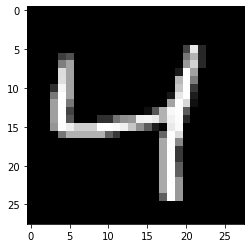

In [ ]:
plt.imshow(x_train[2],'gray')
print(y_train[2])

In [ ]:
# Reshape Dataset
x_train = x_train.reshape(num_train, height * width)
x_test = x_test.reshape(num_test, height * width)
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

In [ ]:
# Normalizar datos
x_train = x_train / 255
x_test = x_test / 255

##One-Hot Encoding Clases

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_class = y_train.shape[1]

print(y_train.shape)
print(y_test.shape)
print(num_class)

(60000, 10)
(10000, 10)
10


##Autoencoder 1

### Estructura AutoEncoder1

In [ ]:
num_ls1 = height * width//2

input_img1 = Input(shape=(height * width,))    #Entrada de 28x28 = 784

encoded1 = Dense(num_ls1, activation='relu')(input_img1)   #Capa de 784/2 = 392

out1 = Dense(height * width, activation='sigmoid')(encoded1)    #Salida de 28x28 = 784

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 784)               308112    
                                                                 
Total params: 615,832
Trainable params: 615,832
Non-trainable params: 0
_________________________________________________________________


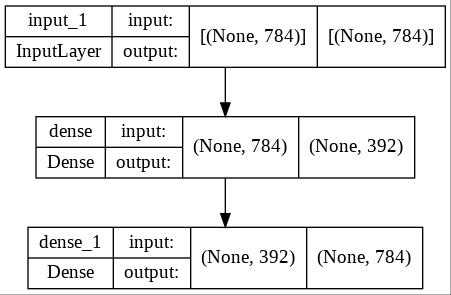

In [ ]:
autoencoder1 = Model(input_img1,out1)
autoencoder1.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

autoencoder1.summary()
plot_model(autoencoder1, to_file='autoencoder1.jpg', show_shapes=True)

### Entrenamiento AutoEncoder1

In [ ]:
history1 = autoencoder1.fit(x_train, x_train, 
                            validation_data=(x_test,x_test), 
                            epochs=50, batch_size=128, shuffle=True)

Epoch 1/50
469/469 [==============================] - 5s 4ms/step - loss: 0.0246 - accuracy: 0.0117 - val_loss: 0.0073 - val_accuracy: 0.0126
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0052 - accuracy: 0.0133 - val_loss: 0.0037 - val_accuracy: 0.0126
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0032 - accuracy: 0.0141 - val_loss: 0.0027 - val_accuracy: 0.0137
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0025 - accuracy: 0.0139 - val_loss: 0.0022 - val_accuracy: 0.0129
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0021 - accuracy: 0.0143 - val_loss: 0.0019 - val_accuracy: 0.0134
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0018 - accuracy: 0.0146 - val_loss: 0.0017 - val_accuracy: 0.0155
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0016 - accuracy: 0.0162 - val_loss: 0.0015 - val_accuracy: 0.0167
Epoch 

In [ ]:
encoder1 = Model(input_img1, encoded1)
ls_coder1_train = encoder1.predict(x_train)
ls_coder1_test = encoder1.predict(x_test)

### Visualización Pérdida AutoEncoder3

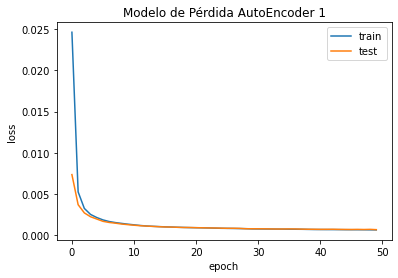

In [ ]:
plt.plot(history1.history['loss']), plt.plot(history1.history['val_loss']), plt.title('Modelo de Pérdida AutoEncoder 1'), plt.xlabel('epoch'), plt.ylabel('loss'), plt.legend(['train','test'], loc = 'upper right')
plt.show()

##Autoencoder 2

### Estructura AutoEncoder2

In [ ]:
num_ls2 = height * width//8

input_img2 = Input(shape=(height * width//2,))    #Capa de 784/2 = 392

encoded2 = Dense(num_ls2, activation='relu')(input_img2)   #Capa de 784/8 = 98

out2 = Dense(height * width//2, activation='sigmoid')(encoded2)    #Salida de 784/2 = 392

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 392)]             0         
                                                                 
 dense_2 (Dense)             (None, 98)                38514     
                                                                 
 dense_3 (Dense)             (None, 392)               38808     
                                                                 
Total params: 77,322
Trainable params: 77,322
Non-trainable params: 0
_________________________________________________________________


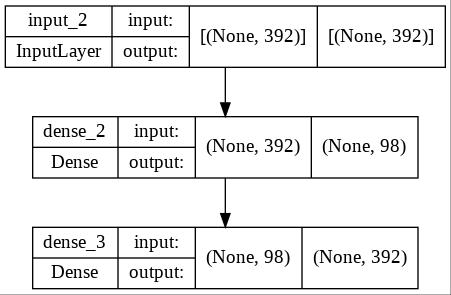

In [ ]:
autoencoder2 = Model(input_img2, out2)
autoencoder2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

autoencoder2.summary()
plot_model(autoencoder2, to_file='autoencoder2.jpg', show_shapes=True)

### Entrenamiento AutoEncoder2

In [ ]:
history2 = autoencoder2.fit(ls_coder1_train, ls_coder1_train, validation_data=(ls_coder1_test, ls_coder1_test), 
                            epochs=250, batch_size=128, shuffle=True)

Epoch 1/250
469/469 [==============================] - 2s 3ms/step - loss: 1.0312 - accuracy: 0.0611 - val_loss: 1.0543 - val_accuracy: 0.0596
Epoch 2/250
469/469 [==============================] - 1s 3ms/step - loss: 1.0305 - accuracy: 0.0624 - val_loss: 1.0537 - val_accuracy: 0.0594
Epoch 3/250
469/469 [==============================] - 1s 3ms/step - loss: 1.0300 - accuracy: 0.0631 - val_loss: 1.0533 - val_accuracy: 0.0601
Epoch 4/250
469/469 [==============================] - 1s 3ms/step - loss: 1.0296 - accuracy: 0.0637 - val_loss: 1.0530 - val_accuracy: 0.0605
Epoch 5/250
469/469 [==============================] - 1s 3ms/step - loss: 1.0293 - accuracy: 0.0642 - val_loss: 1.0529 - val_accuracy: 0.0617
Epoch 6/250
469/469 [==============================] - 2s 4ms/step - loss: 1.0291 - accuracy: 0.0641 - val_loss: 1.0527 - val_accuracy: 0.0600
Epoch 7/250
469/469 [==============================] - 2s 3ms/step - loss: 1.0289 - accuracy: 0.0644 - val_loss: 1.0524 - val_accuracy: 0.0601

In [ ]:
encoder2 = Model(input_img2,encoded2)
ls_coder2_train = encoder2.predict(ls_coder1_train)
ls_coder2_test = encoder2.predict(ls_coder1_test)

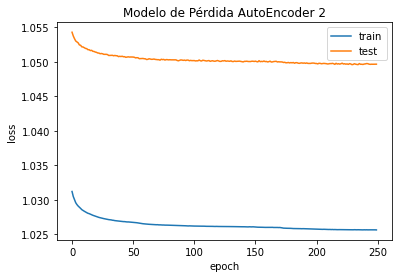

In [ ]:
plt.plot(history2.history['loss']), plt.plot(history2.history['val_loss']), plt.title('Modelo de Pérdida AutoEncoder 2'), plt.xlabel('epoch'), plt.ylabel('loss'), plt.legend(['train','test'], loc = 'upper right')
plt.show()

##Capa Clasificadora

### Estructura Etapa Clasificadora

In [ ]:
input_imgc = Input(shape=(98))

class_layer = Dense(num_classes, activation='softmax')(input_imgc)   

In [ ]:
class_model = Model(input_imgc, class_layer)   #Modelo completo del clasificador

class_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 98)]              0         
                                                                 
 dense_4 (Dense)             (None, 10)                990       
                                                                 
Total params: 990
Trainable params: 990
Non-trainable params: 0
_________________________________________________________________


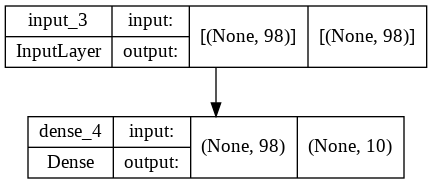

In [ ]:
class_model.summary()
plot_model(class_model, to_file='Clasificador.png', show_shapes=True)

###Entrenamiento Etapa Clasificadora

In [ ]:
historyc = class_model.fit(ls_coder2_train, y_train,
      epochs = 200,
      batch_size = 128,
      shuffle = True,
      validation_data = (ls_coder2_test, y_test))

Epoch 1/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0799 - accuracy: 0.4251 - val_loss: 0.0488 - val_accuracy: 0.6521
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0363 - accuracy: 0.7427 - val_loss: 0.0255 - val_accuracy: 0.8233
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0241 - accuracy: 0.8365 - val_loss: 0.0210 - val_accuracy: 0.8580
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0212 - accuracy: 0.8572 - val_loss: 0.0191 - val_accuracy: 0.8711
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0200 - accuracy: 0.8666 - val_loss: 0.0183 - val_accuracy: 0.8786
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0193 - accuracy: 0.8715 - val_loss: 0.0179 - val_accuracy: 0.8821
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0189 - accuracy: 0.8736 - val_loss: 0.0181 - val_accuracy: 0.8808

### Visualización Pérdida Etapa Clasificadora

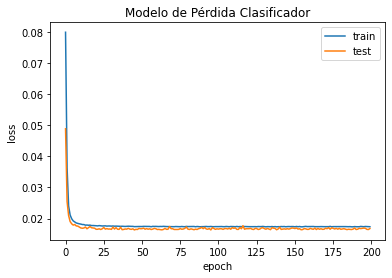

In [ ]:
plt.plot(historyc.history['loss']), plt.plot(historyc.history['val_loss']), plt.title('Modelo de Pérdida Clasificador'), plt.xlabel('epoch'), plt.ylabel('loss'), plt.legend(['train','test'], loc = 'upper right')
plt.show()

##Modelo Final

###Estructura Modelo final

In [ ]:
final_input = Input(shape=(784,))    #Capa de 784

latent_space1 = encoder1.layers[1](final_input)
latent_space2 = encoder2.layers[1](latent_space1)

final_output = class_model.layers[1](latent_space2)

In [ ]:
final_class_model = Model(final_input, final_output)   #Modelo completo del Clasificador

Classifications = final_class_model.predict(x_test)

##Matriz de Confusión

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mtr = confusion_matrix(y_test.argmax(axis=1),Classifications.argmax(axis=1))
print(conf_mtr)

[[ 924    0    6    6    2   13   23    1    5    0]
 [   0 1106    4    4    1    3    3    3   11    0]
 [  12    2  886   31   19    8   25    9   34    6]
 [   1    1   16  904    6   36    3   11   21   11]
 [   0    3    6    3  894    5   26    3    9   33]
 [  15    4    7   75   15  699   24    8   36    9]
 [  10    3    7    3   11    9  911    0    4    0]
 [   3   11   32   11   20    0    1  906    3   41]
 [   3    8    9   69    8   26   24   10  807   10]
 [   5    9    9   18   70   19    4   18   13  844]]


In [ ]:
def plot_confusion_matrix(cm, num_classes,normalize=False,title='Matrix de Confusion',cmap=plt.cm.Blues):
      
      import itertools
      
      classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

      plt.figure(figsize = (10,10))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=90)
      plt.yticks(tick_marks, classes)
      if normalize:
          cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                   horizontalalignment="center",
                   color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.title('MATRIZ DE CONFUSIÓN SIN NORMALIZAR')
      plt.ylabel('ORIGINAL')
      plt.xlabel('PREDICCIONES')

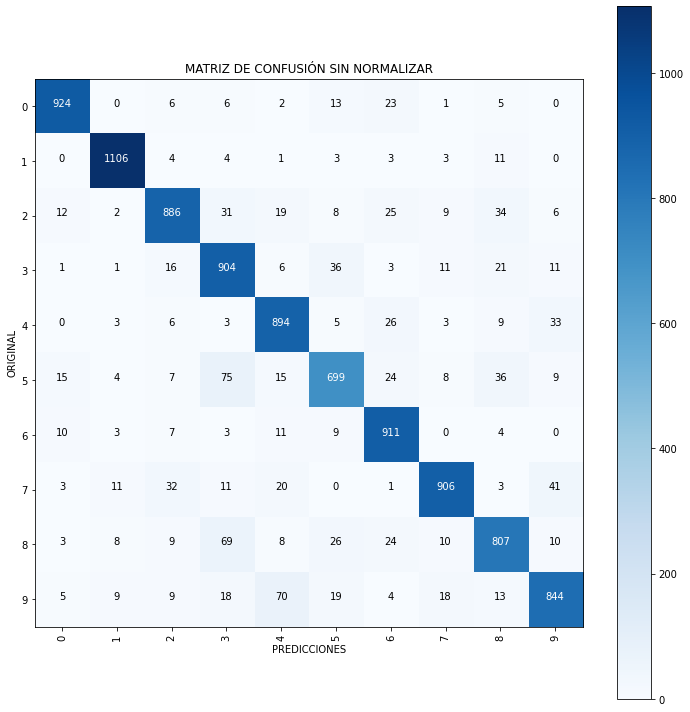

In [ ]:
num_classes = y_test.shape
plot_confusion_matrix(conf_mtr, num_classes)

## Verificación Modelo Final

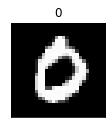

In [ ]:
n = 10  #Cantidad de digitos que se van a mostrar
plt.figure(figsize=(20, 4))

ax =plt.subplot(2, n, 1)
plt.imshow(x_test[3].reshape(28, 28))     #Se muestra la imagen en la posición 6
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title(Classifications.argmax(axis=1)[3])    #Predicción de la posición 6 
plt.show()